In [3]:
import pandas as pd
import seaborn as sns

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pydot

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


In [8]:
df_train = pd.read_csv('all_train_data.csv')
submission_test = pd.read_csv('all_test_data.csv')

df_train.drop(['Unnamed: 0','Name', 'RescuerID', 'Description', 'PetID'], axis=1, inplace=True)
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 34 columns):
Type                   14993 non-null int64
Age                    14993 non-null int64
Breed1                 14993 non-null int64
Breed2                 14993 non-null int64
Gender                 14993 non-null int64
Color1                 14993 non-null int64
Color2                 14993 non-null int64
Color3                 14993 non-null int64
MaturitySize           14993 non-null int64
FurLength              14993 non-null int64
Vaccinated             14993 non-null int64
Dewormed               14993 non-null int64
Sterilized             14993 non-null int64
Health                 14993 non-null int64
Quantity               14993 non-null int64
Fee                    14993 non-null int64
State                  14993 non-null int64
VideoAmt               14993 non-null int64
PhotoAmt               14993 non-null float64
AdoptionSpeed          14993 non-null int64
img_bound

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,domcol_r,domcol_g,domcol_b,docMagnitude,doc_score,sent_count,sen1_magnitude,sen1_score,doc_mag_corr,has_eng_description
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14652.000000,14652.000000,14652.000000,14442.000000,14442.000000,14442.000000,14442.000000,14442.000000,14442.000000,14442.0
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,...,127.684207,112.756484,99.712940,2.127628,0.280951,5.115981,0.405366,0.289039,0.429007,1.0
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,...,66.980750,65.211793,64.234136,2.036914,0.276766,4.812708,0.341130,0.444020,0.217327,0.0
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,0.000000,-0.900000,1.000000,0.000000,-0.900000,0.000000,1.0
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,68.000000,51.000000,47.000000,0.800000,0.100000,2.000000,0.100000,0.000000,0.300000,1.0
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,132.000000,114.000000,89.000000,1.600000,0.300000,4.000000,0.300000,0.200000,0.416667,1.0
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,182.000000,158.000000,151.000000,2.800000,0.400000,7.000000,0.800000,0.700000,0.560000,1.0
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,254.000000,253.000000,253.000000,32.000000,0.900000,84.000000,0.900000,0.900000,1.200000,1.0


In [11]:
df_train = df_train.dropna()
adoptionSpeed=df_train['AdoptionSpeed']
del df_train["AdoptionSpeed"]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14111 entries, 0 to 14992
Data columns (total 33 columns):
Type                   14111 non-null int64
Age                    14111 non-null int64
Breed1                 14111 non-null int64
Breed2                 14111 non-null int64
Gender                 14111 non-null int64
Color1                 14111 non-null int64
Color2                 14111 non-null int64
Color3                 14111 non-null int64
MaturitySize           14111 non-null int64
FurLength              14111 non-null int64
Vaccinated             14111 non-null int64
Dewormed               14111 non-null int64
Sterilized             14111 non-null int64
Health                 14111 non-null int64
Quantity               14111 non-null int64
Fee                    14111 non-null int64
State                  14111 non-null int64
VideoAmt               14111 non-null int64
PhotoAmt               14111 non-null float64
img_bound_polygon_x    14111 non-null float64
img_bou

Feature ranking:
1. feature 23 (0.066240)
2. feature 25 (0.066205)
3. feature 24 (0.063864)
4. feature 1 (0.061399)
5. feature 26 (0.059412)
6. feature 31 (0.058844)
7. feature 18 (0.047317)
8. feature 19 (0.043310)
9. feature 28 (0.043280)
10. feature 20 (0.042466)
11. feature 27 (0.040817)
12. feature 2 (0.040213)
13. feature 30 (0.039988)
14. feature 29 (0.035776)
15. feature 6 (0.032525)
16. feature 5 (0.030000)
17. feature 16 (0.025429)
18. feature 3 (0.022529)
19. feature 4 (0.019208)
20. feature 12 (0.018815)
21. feature 9 (0.018521)
22. feature 14 (0.018461)
23. feature 8 (0.017717)
24. feature 7 (0.016492)
25. feature 11 (0.016136)
26. feature 10 (0.016057)
27. feature 15 (0.015986)
28. feature 0 (0.007358)
29. feature 22 (0.005396)
30. feature 17 (0.004452)
31. feature 13 (0.003655)
32. feature 21 (0.002132)
33. feature 32 (0.000000)


<IPython.core.display.Javascript object>


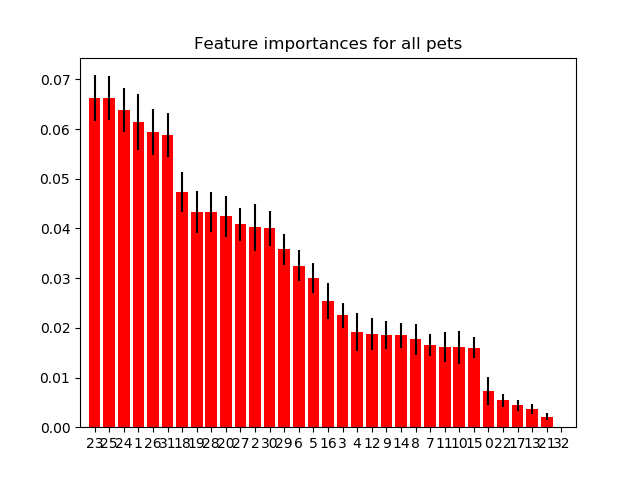

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Separate the data into train and test randomly
train, test, adoptionSpeed_train, adoptionSpeed_test = train_test_split(df_train, adoptionSpeed, test_size=0.2)
model = RandomForestClassifier(n_estimators=500) # n_estimators number of decision trees

# Train a random forest classifier for feature importance for all pets
model.fit(train, adoptionSpeed_train)

importances = model.feature_importances_
std = np.std([t.feature_importances_ for t in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
labels = list(train.columns.values)
ordered_labels = [labels[i] for i in indices]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for all pets")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

In [15]:
print(ordered_labels)

['domcol_r', 'domcol_b', 'domcol_g', 'Age', 'docMagnitude', 'doc_mag_corr', 'PhotoAmt', 'img_bound_polygon_x', 'sent_count', 'img_bound_polygon_y', 'doc_score', 'Breed1', 'sen1_score', 'sen1_magnitude', 'Color2', 'Color1', 'State', 'Breed2', 'Gender', 'Sterilized', 'FurLength', 'Quantity', 'MaturitySize', 'Color3', 'Dewormed', 'Vaccinated', 'Fee', 'Type', 'img_imp_fract', 'VideoAmt', 'Health', 'img_confidence', 'has_eng_description']


In [17]:
# Creating a new data frame with only the 15 most important features for the train and test
feature_train = train.iloc[:, indices[0]]
feature_test = test.iloc[:, indices[0]]

for i in range(1, 15):
    subset1 = train.iloc[ : ,indices[i]]
    subset2 = test.iloc[ : ,indices[i]]
    feature_train = pd.concat([feature_train, subset1], axis=1)
    feature_test = pd.concat([feature_test, subset2], axis=1)

feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11288 entries, 12942 to 9008
Data columns (total 15 columns):
domcol_r               11288 non-null float64
domcol_b               11288 non-null float64
domcol_g               11288 non-null float64
Age                    11288 non-null int64
docMagnitude           11288 non-null float64
doc_mag_corr           11288 non-null float64
PhotoAmt               11288 non-null float64
img_bound_polygon_x    11288 non-null float64
sent_count             11288 non-null float64
img_bound_polygon_y    11288 non-null float64
doc_score              11288 non-null float64
Breed1                 11288 non-null int64
sen1_score             11288 non-null float64
sen1_magnitude         11288 non-null float64
Color2                 11288 non-null int64
dtypes: float64(12), int64(3)
memory usage: 1.4 MB


In [23]:
# Random Forest + grid search cv + adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

# Parameter settings to explore
parameters = {'max_depth':[2, 4, 6, 8, 10, 15, 20], 'min_samples_split':[2, 10, 25, 50]}
random_forest = RandomForestClassifier(n_estimators=500)
gridsearch_forest = GridSearchCV(random_forest, parameters, cv=5)
gridsearch_forest.fit(train, adoptionSpeed_train)

# Gives the most optimal settings from the parameters space
best_parameters = gridsearch_forest.best_params_

# Retrain the model on best settings
best_forest = RandomForestClassifier(n_estimators=100, **best_parameters)

# Boost the model with base random forest
ada_boost = AdaBoostClassifier(base_estimator=best_forest)
ada_boost.fit(train, adoptionSpeed_train)
ada_predicted = ada_boost.predict(test)
print(accuracy_score(adoptionSpeed_test, ada_predicted))

0.41764080765143463


In [29]:
submission_test.drop(['Unnamed: 0','Name', 'RescuerID', 'Description', 'PetID'], axis=1, inplace=True)

KeyError: "labels ['Unnamed: 0' 'Name' 'RescuerID' 'Description' 'PetID'] not contained in axis"

In [32]:
from numpy import *
submission_test.describe()
all_nans = isnan(submission_test)
submission_test[all_nans] = 0
submission_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948 entries, 0 to 3947
Data columns (total 33 columns):
Type                   3948 non-null int64
Age                    3948 non-null int64
Breed1                 3948 non-null int64
Breed2                 3948 non-null int64
Gender                 3948 non-null int64
Color1                 3948 non-null int64
Color2                 3948 non-null int64
Color3                 3948 non-null int64
MaturitySize           3948 non-null int64
FurLength              3948 non-null int64
Vaccinated             3948 non-null int64
Dewormed               3948 non-null int64
Sterilized             3948 non-null int64
Health                 3948 non-null int64
Quantity               3948 non-null int64
Fee                    3948 non-null int64
State                  3948 non-null int64
VideoAmt               3948 non-null int64
PhotoAmt               3948 non-null float64
img_bound_polygon_x    3948 non-null float64
img_bound_polygon_y    3948 n

In [39]:
prediction = ada_boost.predict(submission_test)
type(prediction)
np.savetxt('sample_submission.csv', prediction)